## Author: Ruchika Das

## Organisation : The Sparks Foundation

Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
sns.set

<function seaborn.rcmod.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)>

In [2]:
#Load the dataset
dataset= pd.read_csv('Iris.csv')
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Within-Cluster Sum of Square(WCSS)

WCSS is defined as the sum of squared distance between each member of the cluster and centroid

In [8]:
#Finding the optimum number of cluster for k-means classification
X = dataset.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state= 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

### Elbow method

The k-Elbow visualizer implements the "elbow" method of selesting the optional number of clusters for k-means clustering

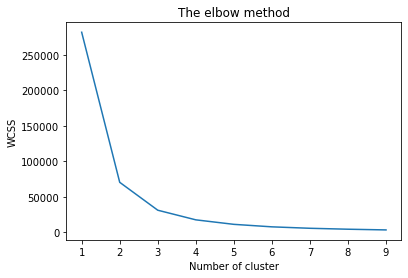

In [10]:
# Plotting the results onto a line graph,
# allowing us to odserve 'The elbow'
plt.plot(range(1, 10), wcss)
plt.title('The elbow method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS') # within cluster sum of squares
plt.show()

### Predict the model

In [13]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init= 10, random_state= 0)
y_kmeans = kmeans.fit_predict(X)

In [14]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Visualization

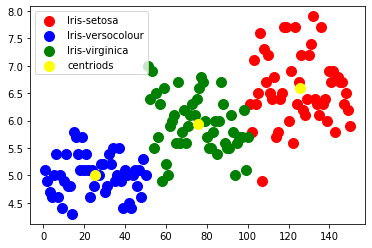

In [17]:
# We will use scatter plotting for each cluster of different colours for better representation
plt.scatter(X[y_kmeans ==0, 0],X[y_kmeans ==0, 1],s= 100, c= 'red', label= 'Iris-setosa')
plt.scatter(X[y_kmeans ==1, 0],X[y_kmeans ==1, 1],s= 100, c= 'blue', label= 'Iris-versocolour')
plt.scatter(X[y_kmeans ==2, 0],X[y_kmeans ==2, 1],s= 100, c= 'green', label= 'Iris-virginica')

#plotting the centroids of the cluster
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s= 100, c= 'yellow', label= 'centriods')
plt.legend()


### The optimal number of cluster is 3 and it is visually represented above